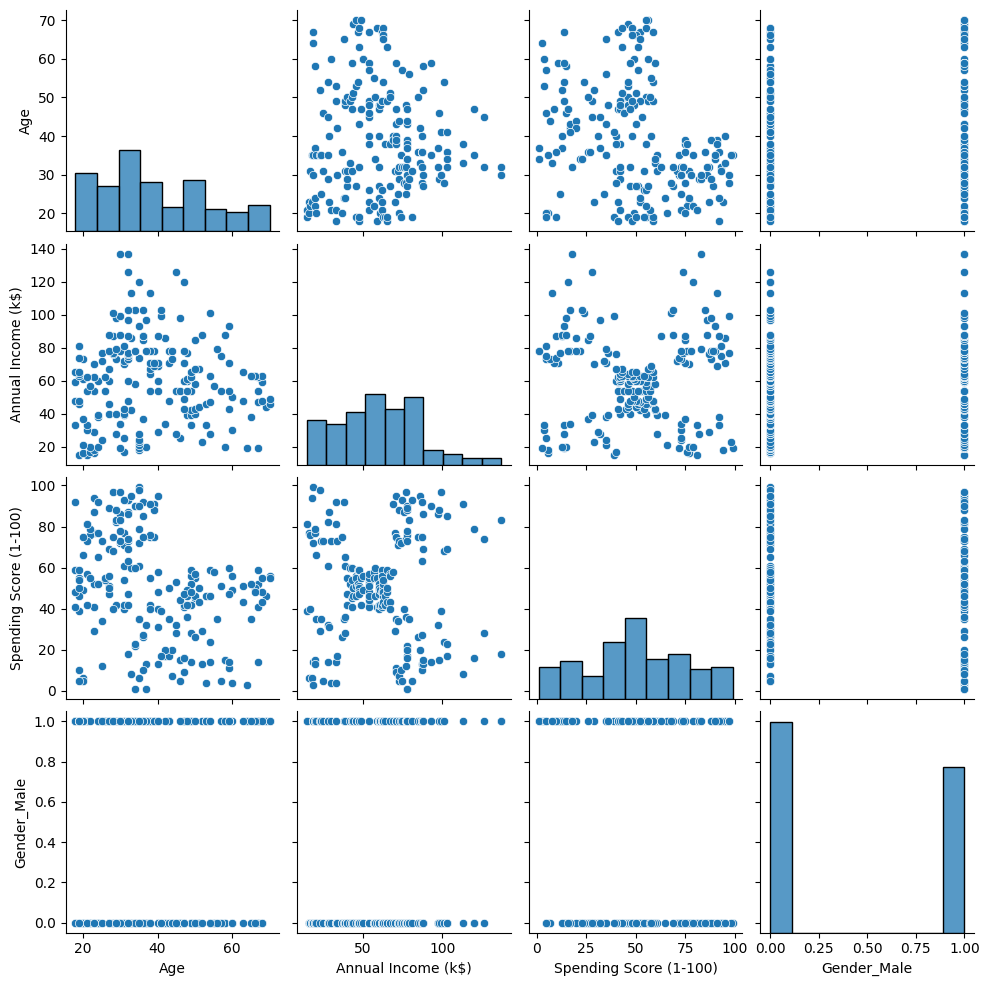

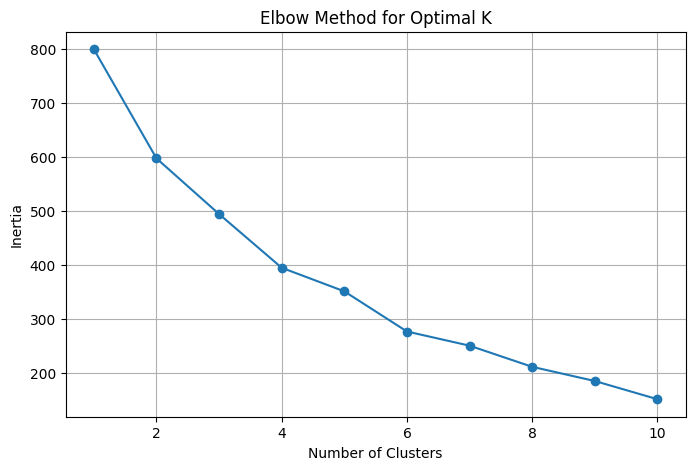

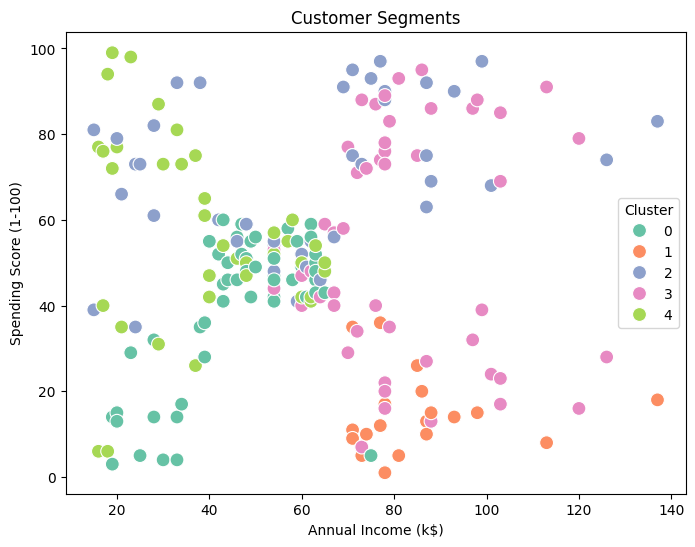

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,True,2
1,21,15,81,True,2
2,20,16,6,False,4
3,23,16,77,False,4
4,31,17,40,False,4


In [1]:
# Customer Segmentation with KMeans - Jupyter Notebook

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

# Step 2: Load Dataset
df = pd.read_csv("Mall_Customers.csv")  # Make sure this CSV is in your working directory
df.head()

# Step 3: Data Cleaning & Preprocessing
df.drop("CustomerID", axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)  # Converts Gender to binary

# Step 4: EDA (Optional, but good to visualize)
sns.pairplot(df)
plt.show()

# Step 5: Prepare Data for Clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Find Optimal Clusters using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 7: Train Final Model
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

# Step 8: Visualize the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments")
plt.show()

# Step 9: Save Model and Scaler
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Step 10: Export Segmented Data
df.to_csv("segmented_customers.csv", index=False)
df.head()
